In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import folium

In [2]:
DJ=pd.read_excel('대전 물가 데이터.xlsx')

DJ

,월,품목,조사기준,가 오 동,관평동,노은2동,대 동,대화동,덕암동,둔산동,...,온천1동,온천2동,용 전 동,월평동,전민동,진잠동,탄방동,회 덕 동,구즉동,노은1동
0,2014-10,감귤,100g 정도 10개,9900.0,6900.000000,8000.0,8500.0,NaN,1170.000000,7353.333333,...,8600.0,8450.0,7700.0,6530.0,5750.0,6900.0,3928.0,8000.000000,NaN,NaN
1,2014-10,대파,1kg,NaN,1500.000000,1800.0,1900.0,2500.000000,1320.000000,1523.333333,...,1500.0,1795.0,1780.0,2980.0,1990.0,1550.0,1850.0,2500.000000,NaN,NaN
2,2014-10,오징어(냉동),25cm정도1마리,2950.0,1700.000000,1700.0,1700.0,3000.000000,2000.000000,2448.333333,...,2000.0,2745.0,NaN,1980.0,2500.0,2550.0,1100.0,2300.000000,NaN,NaN
3,2014-10,소주,"O2린 360ml, 1병",1080.0,1090.000000,1090.0,1090.0,1200.000000,1200.000000,1073.333333,...,1080.0,1095.0,1060.0,1045.0,1090.0,1085.0,1080.0,1100.000000,NaN,NaN
4,2014-10,참깨,국산 500g,NaN,NaN,21000.0,NaN,10410.000000,NaN,19950.000000,...,18000.0,15250.0,NaN,NaN,NaN,NaN,21854.0,14830.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,2024-9,화장지,크리넥스 35mⅹ24롤(백색),17950.0,24313.333333,27970.0,NaN,25000.000000,25900.000000,30500.000000,...,24250.0,24540.0,16850.0,23480.0,28392.0,23900.0,NaN,24900.000000,28800.0,27900.0
5091,2024-9,무,통무우 2kg,3480.0,3993.333333,3990.0,NaN,4545.454545,3690.000000,2380.000000,...,2490.0,3995.0,3480.0,3480.0,3990.0,3900.0,NaN,6258.692629,3190.0,3990.0
5092,2024-9,배추,통배추 2kg,7992.0,9160.000000,5990.0,NaN,NaN,8800.000000,4735.000000,...,4990.0,6445.0,7980.0,8980.0,5900.0,7950.0,NaN,NaN,7480.0,8990.0
5093,2024-9,생닭,"하림, 육계 1마리 1kg",10990.0,8395.000000,10990.0,NaN,6500.000000,9848.461857,7730.000000,...,7190.0,7495.0,9980.0,10880.0,19980.0,10990.0,NaN,6952.380952,15050.0,9990.0


In [5]:
DJ.columns

Index(['월', '품목', '조사기준', '가 오 동', '관평동', '노은2동', '대    동', '대화동', '덕암동',
       '둔산동', '문화동', '비래동', '석봉,목상동', '송 촌 동', '신성동', '신탄진동', '안영동', '오정동',
       '온천1동', '온천2동', '용 전 동', '월평동', '전민동', '진잠동', '탄방동', '회 덕 동', '구즉동',
       '노은1동'],
      dtype='object')

In [7]:
DJ['품목'].unique()

array(['감귤', '대파', '오징어(냉동)', '소주', '참깨', '고추가루', '콩', '돼지고기', '깐마늘',
       '두부', '밤', '분유', '달걀', '분말커피', '양파', '우유', '멸치', '식용유', '청주', '사과',
       '빵', '조기', '동태', '콩나물', '배', '라면', '세제', '참기름', '쌀', '김', '설탕',
       '밀가루', '맥주', '화장지', '무', '배추', '생닭', '쇠고기', '기타'], dtype=object)

In [3]:
DJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       5095 non-null   object 
 1   품목      5095 non-null   object 
 2   조사기준    5095 non-null   object 
 3   가 오 동   4237 non-null   float64
 4   관평동     4885 non-null   float64
 5   노은2동    4409 non-null   float64
 6   대    동  1563 non-null   float64
 7   대화동     3138 non-null   float64
 8   덕암동     4239 non-null   float64
 9   둔산동     4992 non-null   float64
 10  문화동     4694 non-null   float64
 11  비래동     4512 non-null   float64
 12  석봉,목상동  4144 non-null   float64
 13  송 촌 동   4126 non-null   float64
 14  신성동     4122 non-null   float64
 15  신탄진동    3885 non-null   float64
 16  안영동     4808 non-null   float64
 17  오정동     4151 non-null   float64
 18  온천1동    4419 non-null   float64
 19  온천2동    4815 non-null   float64
 20  용 전 동   4300 non-null   float64
 21  월평동     4035 non-null   float64
 22  

In [4]:
DJ.isnull().sum()

월            0
품목           0
조사기준         0
가 오 동      858
관평동        210
노은2동       686
대    동    3532
대화동       1957
덕암동        856
둔산동        103
문화동        401
비래동        583
석봉,목상동     951
송 촌 동      969
신성동        973
신탄진동      1210
안영동        287
오정동        944
온천1동       676
온천2동       280
용 전 동      795
월평동       1060
전민동        792
진잠동        531
탄방동       2496
회 덕 동     1317
구즉동       1913
노은1동      2640
dtype: int64

In [10]:
# 1. 동별 컬럼만 선택 (공백 문제 해결을 위해 strip() 적용)
region_columns = [col.strip() for col in DJ.columns if col not in ['월', '품목', '조사기준']]

# 2. 데이터를 '긴 형식'으로 변환 (melt 사용)
melted_DJ = DJ.melt(id_vars=['월', '품목', '조사기준'], 
                     value_vars=region_columns, 
                     var_name='동', 
                     value_name='가격')

# 3. 품목 & 동별 결측치 개수 계산 (isnull() 적용 후 sum())
missing_values = melted_DJ.groupby(['품목', '동'])['가격'].apply(lambda x: x.isnull().sum()).reset_index()

# 4. 컬럼명 정리
missing_values.rename(columns={'가격': '결측치 개수'}, inplace=True)

# 5. 결측치 개수 내림차순 정렬
missing_values = missing_values.sort_values(by='결측치 개수', ascending=False)

# 6. 데이터 확인 (로컬 환경)
print(missing_values.head(20))  # 상위 20개 출력

     품목       동  결측치 개수
855  참깨  대    동     244
864  참깨    신탄진동     243
862  참깨   송 촌 동     225
873  참깨     탄방동     208
853  참깨    노은1동     204
850  참깨   가 오 동     196
705   쌀  대    동     185
874  참깨   회 덕 동     176
723   쌀     탄방동     174
230  두부  대    동     157
703   쌀    노은1동     156
870  참깨     월평동     150
231  두부     대화동     143
861  참깨  석봉,목상동     135
866  참깨     오정동     134
711   쌀  석봉,목상동     131
724   쌀   회 덕 동     130
714   쌀    신탄진동     130
863  참깨     신성동     129
706   쌀     대화동     129


동     가 오 동  관평동  구즉동  노은1동  노은2동  대    동  대화동  덕암동  둔산동  문화동  ...  안영동  오정동  \
품목                                                             ...             
감귤       18   13   44    63    14      86   96   41    4   33  ...   42   61   
고추가루     12    1   34    54     2      82   19   11    1    0  ...    0   12   
기타        7    7   10    10     7      11   11   11    0   11  ...   11   11   
김        50    1   32   105    43      77  118   13    0    1  ...    1   23   
깐마늘       1    1   32    32     2      76   10   10    0    0  ...    0   12   
달걀        0    3   32    32     7      82   10   11    0    1  ...    1   12   
대파        6    1   33    32     2      76   12   11    0    0  ...    0   13   
동태       13    6   52   120    53     106   11   31    0    2  ...    1   13   
돼지고기      1    1   32    32     2      76   10   10    0    1  ...    1   12   
두부        2    2   64    64     4     157  143   27    0    2  ...    2   43   

동     온천1동  온천2동  용 전 동  월평동  전민동  진잠동 

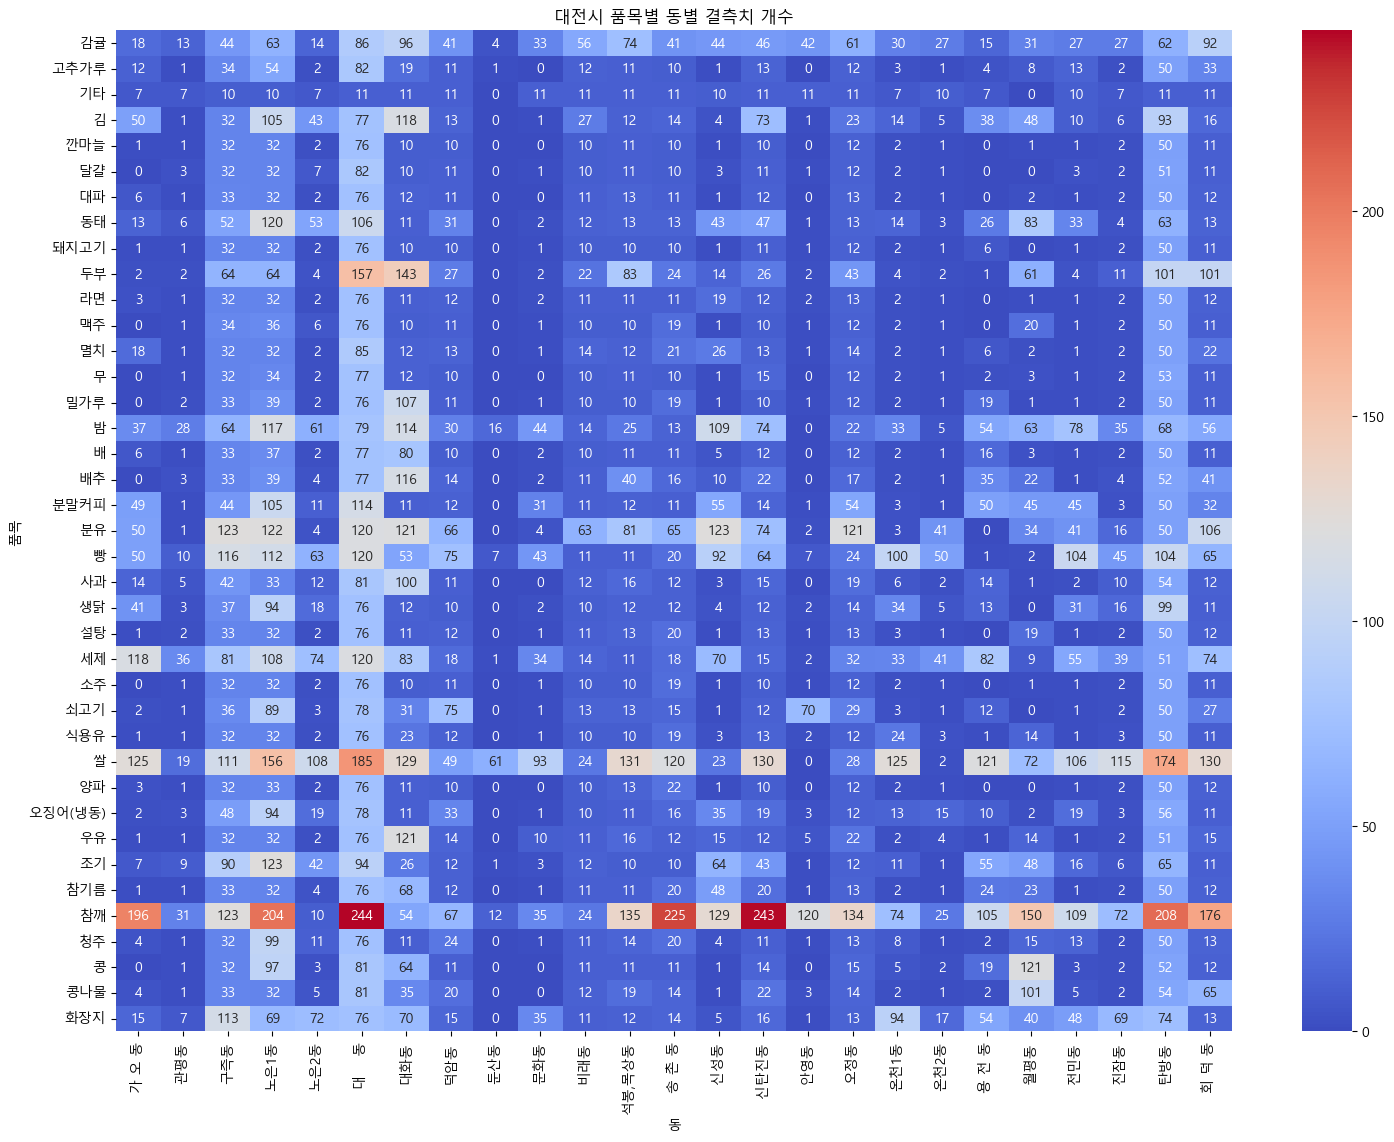

In [18]:
# 1. 동별 컬럼만 선택 (공백 문제 해결을 위해 strip() 적용)
region_columns = [col.strip() for col in DJ.columns if col not in ['월', '품목', '조사기준']]

# 2. 데이터를 '긴 형식'으로 변환 (melt 사용)
melted_DJ = DJ.melt(id_vars=['월', '품목', '조사기준'], 
                     value_vars=region_columns, 
                     var_name='동', 
                     value_name='가격')

# 3. 품목 & 동별 결측치 개수 계산
missing_values = melted_DJ.groupby(['품목', '동'])['가격'].apply(lambda x: x.isnull().sum()).reset_index()

# 4. 컬럼명 정리
missing_values.rename(columns={'가격': '결측치 개수'}, inplace=True)

# 5. 피벗 테이블 생성 (행: 품목, 열: 동, 값: 결측치 개수)
pivot_table = missing_values.pivot(index='품목', columns='동', values='결측치 개수')

# 6. 데이터 확인 (로컬 환경)
print(pivot_table.head(10))  # 상위 10개 출력

# 7. CSV로 저장 (엑셀에서 확인 가능)
# pivot_table.to_csv("품목별_동별_결측치_분석.csv", encoding="utf-8-sig")

# Jupyter Notebook 사용 시 (깔끔한 출력)
# display(pivot_table)

# 8. 히트맵 시각화
plt.figure(figsize=(18, 13))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("대전시 품목별 동별 결측치 개수")
plt.xlabel("동")
plt.ylabel("품목")
plt.show()

In [19]:
re_DJ=pd.read_excel('수정_대전 물가 데이터.xlsx')

re_DJ

,월,품목,조사기준,가 오 동,관평동,노은2동,덕암동,둔산동,문화동,비래동,...,신탄진동,안영동,오정동,온천1동,온천2동,용 전 동,월평동,전민동,진잠동,회 덕 동
0,2014-10,감귤,100g 정도 10개,9900.0,6900.000000,8000.0,1170.000000,7353.333333,NaN,5000.000000,...,8900.000000,NaN,NaN,8600.0,8450.0,7700.0,6530.0,5750.0,6900.0,8000.000000
1,2014-10,대파,1kg,NaN,1500.000000,1800.0,1320.000000,1523.333333,1780.0,1500.000000,...,1090.000000,1300.0,1500.0,1500.0,1795.0,1780.0,2980.0,1990.0,1550.0,2500.000000
2,2014-10,오징어(냉동),25cm정도1마리,2950.0,1700.000000,1700.0,2000.000000,2448.333333,2650.0,3000.000000,...,2500.000000,2500.0,2500.0,2000.0,2745.0,NaN,1980.0,2500.0,2550.0,2300.000000
3,2014-10,소주,"O2린 360ml, 1병",1080.0,1090.000000,1090.0,1200.000000,1073.333333,1080.0,1150.000000,...,1090.000000,1080.0,1200.0,1080.0,1095.0,1060.0,1045.0,1090.0,1085.0,1100.000000
4,2014-10,고추가루,"국산, 400g",NaN,3200.000000,13600.0,19360.000000,10510.000000,12880.0,21600.000000,...,16720.000000,8560.0,13000.0,2853.0,18450.0,8500.0,6592.0,2800.0,3100.0,10660.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,2024-9,화장지,크리넥스 35mⅹ24롤(백색),17950.0,24313.333333,27970.0,25900.000000,30500.000000,5950.0,28000.000000,...,27120.000000,5940.0,26000.0,24250.0,24540.0,16850.0,23480.0,28392.0,23900.0,24900.000000
4595,2024-9,무,통무우 2kg,3480.0,3993.333333,3990.0,3690.000000,2380.000000,3990.0,3500.000000,...,5973.333333,3950.0,4200.0,2490.0,3995.0,3480.0,3480.0,3990.0,3900.0,6258.692629
4596,2024-9,배추,통배추 2kg,7992.0,9160.000000,5990.0,8800.000000,4735.000000,7990.0,8666.666667,...,3000.000000,8720.0,NaN,4990.0,6445.0,7980.0,8980.0,5900.0,7950.0,NaN
4597,2024-9,생닭,"하림, 육계 1마리 1kg",10990.0,8395.000000,10990.0,9848.461857,7730.000000,5990.0,6900.000000,...,13980.000000,7500.0,8000.0,7190.0,7495.0,9980.0,10880.0,19980.0,10990.0,6952.380952


동     가 오 동  관평동  노은2동  덕암동  둔산동  문화동  비래동  석봉,목상동  송 촌 동  신성동  신탄진동  안영동  \
품목                                                                          
감귤       18   13    14   41    4   33   56      74     41   44    46   42   
고추가루     12    1     2   11    1    0   12      11     10    1    13    0   
기타        7    7     7   11    0   11   11      11     11   10    11   11   
김        50    1    43   13    0    1   27      12     14    4    73    1   
깐마늘       1    1     2   10    0    0   10      11     10    1    10    0   
달걀        0    3     7   11    0    1   10      11     10    3    11    1   
대파        6    1     2   11    0    0   11      13     11    1    12    0   
동태       13    6    53   31    0    2   12      13     13   43    47    1   
돼지고기      1    1     2   10    0    1   10      10     10    1    11    1   
두부        0    1     2   12    0    1   11      11     12   11    15    1   

동     오정동  온천1동  온천2동  용 전 동  월평동  전민동  진잠동  회 덕 동  
품목                    

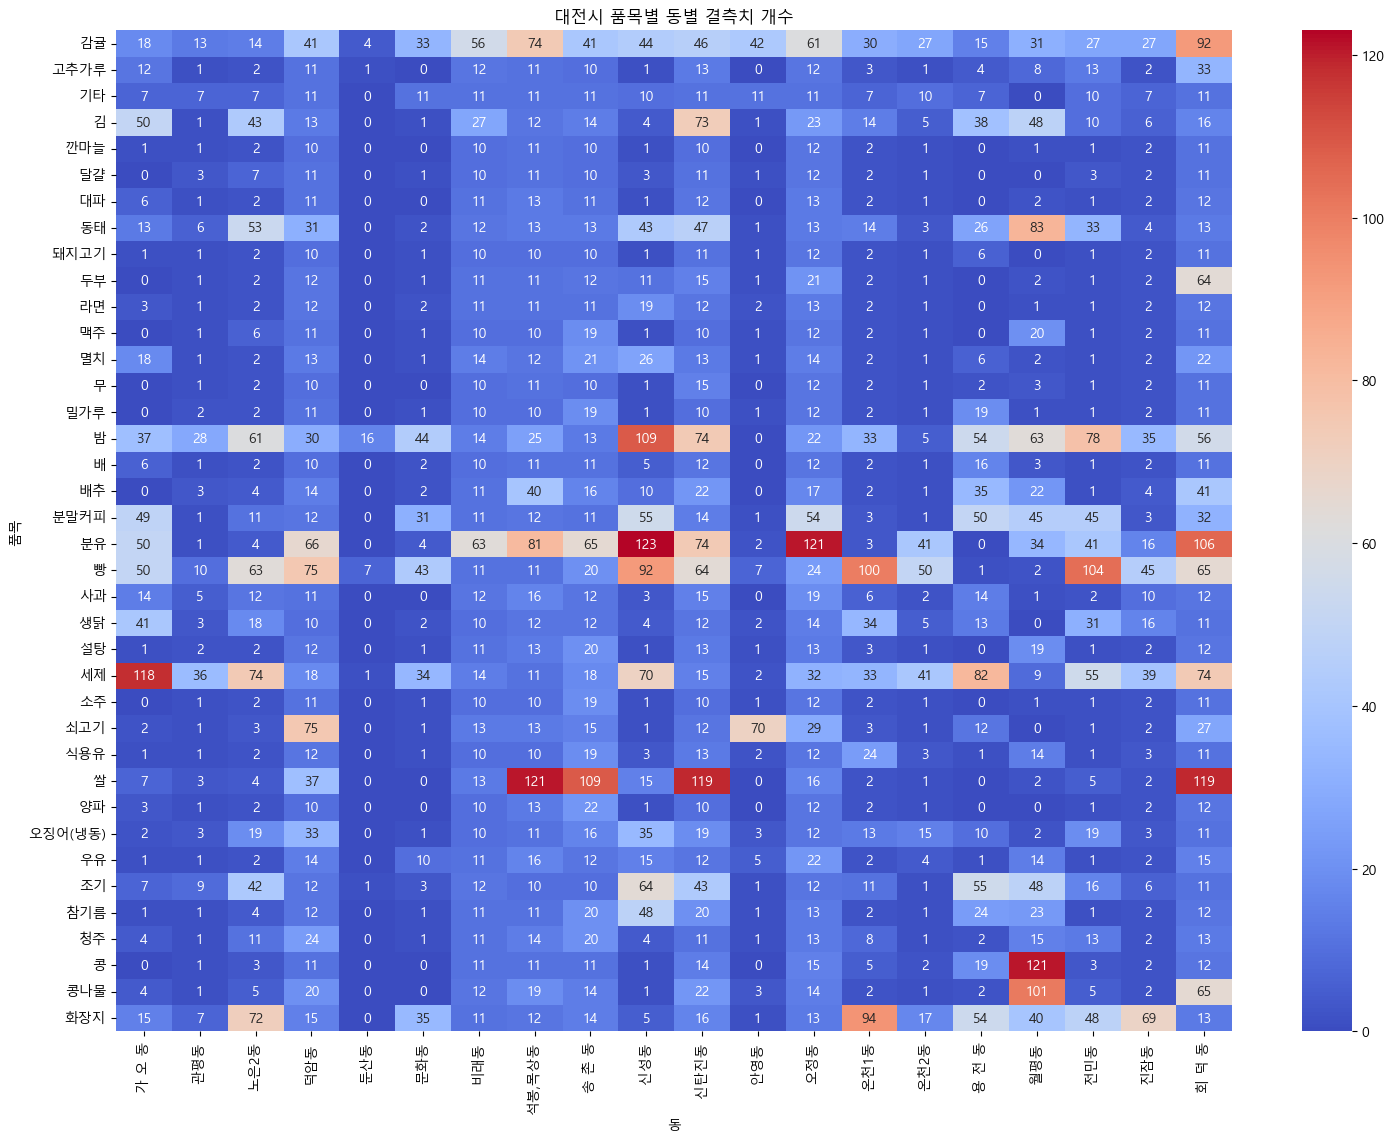

In [20]:
# 1. 동별 컬럼만 선택 (공백 문제 해결을 위해 strip() 적용)
region_columns = [col.strip() for col in re_DJ.columns if col not in ['월', '품목', '조사기준']]

# 2. 데이터를 '긴 형식'으로 변환 (melt 사용)
melted_re_DJ = re_DJ.melt(id_vars=['월', '품목', '조사기준'], 
                     value_vars=region_columns, 
                     var_name='동', 
                     value_name='가격')

# 3. 품목 & 동별 결측치 개수 계산
missing_values = melted_re_DJ.groupby(['품목', '동'])['가격'].apply(lambda x: x.isnull().sum()).reset_index()

# 4. 컬럼명 정리
missing_values.rename(columns={'가격': '결측치 개수'}, inplace=True)

# 5. 피벗 테이블 생성 (행: 품목, 열: 동, 값: 결측치 개수)
pivot_table = missing_values.pivot(index='품목', columns='동', values='결측치 개수')

# 6. 데이터 확인 (로컬 환경)
print(pivot_table.head(10))  # 상위 10개 출력

# 7. CSV로 저장 (엑셀에서 확인 가능)
# pivot_table.to_csv("품목별_동별_결측치_분석.csv", encoding="utf-8-sig")

# Jupyter Notebook 사용 시 (깔끔한 출력)
# display(pivot_table)

# 8. 히트맵 시각화
plt.figure(figsize=(18, 13))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("대전시 품목별 동별 결측치 개수")
plt.xlabel("동")
plt.ylabel("품목")
plt.show()

In [26]:
count_rice_gaodong_total = DJ[DJ['품목'] == '콩'].shape[0]

print(f"가오동에서 '콩'이 기록된 총 횟수 (결측치 포함): {count_rice_gaodong_total}번")

가오동에서 '콩'이 기록된 총 횟수 (결측치 포함): 124번


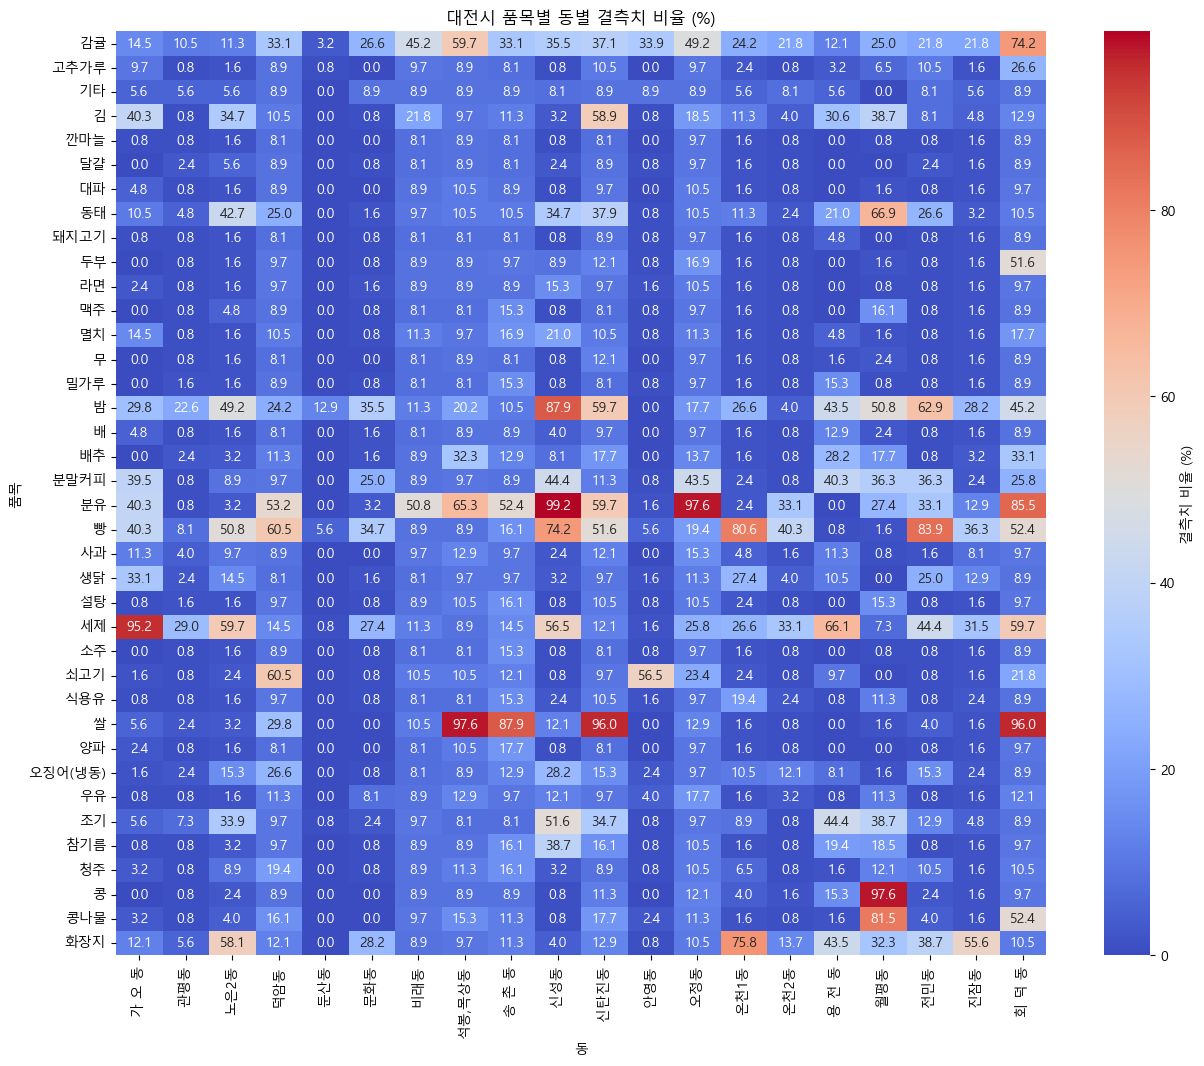

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 결측치 개수를 총 횟수로 나눠 퍼센트로 변환
percentage_missing = (pivot_table / 124) * 100

# 2. 히트맵 시각화 (퍼센트 표시)
plt.figure(figsize=(15, 12))
sns.heatmap(percentage_missing, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': '결측치 비율 (%)'})
plt.title("대전시 품목별 동별 결측치 비율 (%)")
plt.xlabel("동")
plt.ylabel("품목")
plt.show()